In [1]:
#Import modules
import pandas as pd

In [2]:
# Load the CSV file
base = '../rcie-system-metrics-data/'
domain = '2023-04-18_13-59-12_rcie-api-default/'
file = 'metrics-with-output-and-standardized-unit.csv'

file_path = base + domain + file
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the data
print(data.head())

                  Time  Timestamp [ms]  iowait [Ratios]  irq [Ratios]   
0  2023-04-18 13:59:10   1681801150000              0.0             0  \
1  2023-04-18 13:59:15   1681801155000              0.0             0   
2  2023-04-18 13:59:20   1681801160000              0.0             0   
3  2023-04-18 13:59:25   1681801165000              0.0             0   
4  2023-04-18 13:59:30   1681801170000              0.0             0   

   nice [Ratios]  softirq [Ratios]  steal [Ratios]  system [Ratios]   
0              0               0.0           0.002            0.002  \
1              0               0.0           0.000            0.002   
2              0               0.0           0.000            0.002   
3              0               0.0           0.002            0.000   
4              0               0.0           0.000            0.002   

   user [Ratios]  Used [MiB]  ...  lo transmit [MB/s]   
0          0.002         311  ...                 0.0  \
1          0.000    

In [4]:
# Display summary statistics
print(data.describe())

       Timestamp [ms]  iowait [Ratios]  irq [Ratios]  nice [Ratios]   
count    2.126000e+03      2126.000000        2126.0         2126.0  \
mean     1.681806e+12         0.000017           0.0            0.0   
std      3.069338e+06         0.000229           0.0            0.0   
min      1.681801e+12         0.000000           0.0            0.0   
25%      1.681804e+12         0.000000           0.0            0.0   
50%      1.681806e+12         0.000000           0.0            0.0   
75%      1.681809e+12         0.000000           0.0            0.0   
max      1.681812e+12         0.006000           0.0            0.0   

       softirq [Ratios]  steal [Ratios]  system [Ratios]  user [Ratios]   
count       2126.000000     2126.000000      2126.000000    2126.000000  \
mean           0.027431        0.019532         0.030885       0.080198   
std            0.021404        0.014667         0.021166       0.054999   
min            0.000000        0.000000         0.000000    

In [5]:
# Convert the datetime column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the datetime column as the index
data.set_index('Time', inplace=True)

# Sort the DataFrame by the index (if not already sorted)
data.sort_index(inplace=True)

In [6]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values using interpolation
data.interpolate(inplace=True)

Timestamp [ms]                     0
iowait [Ratios]                    0
irq [Ratios]                       0
nice [Ratios]                      0
softirq [Ratios]                   0
steal [Ratios]                     0
system [Ratios]                    0
user [Ratios]                      0
Used [MiB]                         0
Buffer [MiB]                       0
Cached [MiB]                       0
Free [MiB]                         0
br-10cd1f6f3899 receive [MB/s]     0
docker0 receive [MB/s]             0
eth0 receive [MB/s]                0
eth1 receive [MB/s]                0
lo receive [MB/s]                  0
veth6750e95 receive [MB/s]         0
br-10cd1f6f3899 transmit [MB/s]    0
docker0 transmit [MB/s]            0
eth0 transmit [MB/s]               0
eth1 transmit [MB/s]               0
lo transmit [MB/s]                 0
veth6750e95 transmit [MB/s]        0
total-req-rate [req/s]             0
ok-req-rate [req/s]                0
error-req-rate [req/s]             0
l

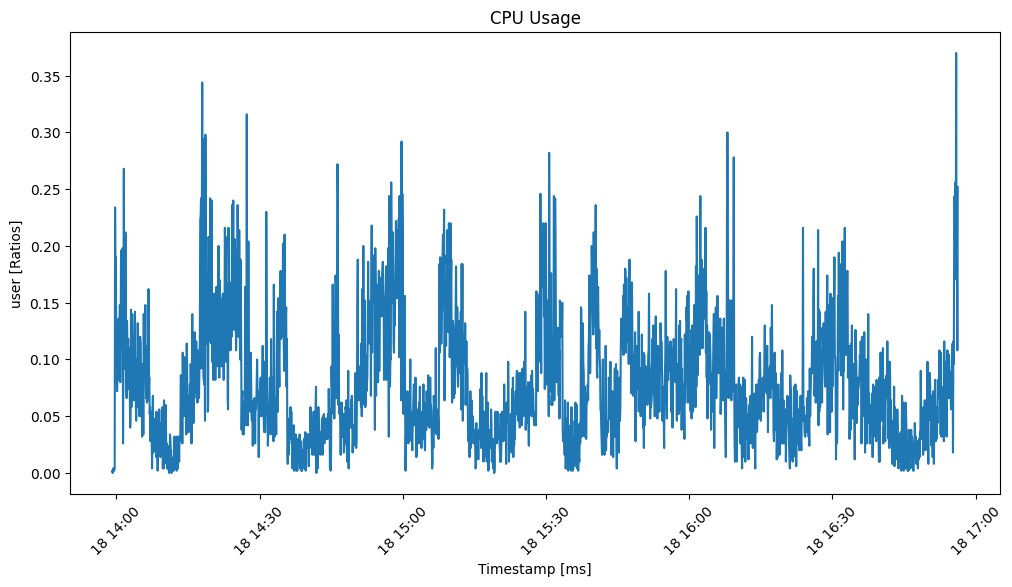

In [7]:
import matplotlib.pyplot as plt

# Convert the time values to pandas Timestamps
time = pd.to_datetime(data.index)
cpu_user = data['user [Ratios]']

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(time, cpu_user)

plt.xlabel('Timestamp [ms]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.ylabel('user [Ratios]')
plt.title('CPU Usage')
plt.show()

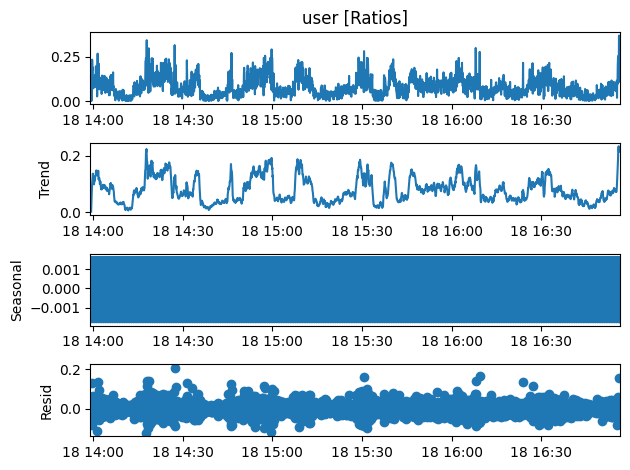

In [12]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Define the seasonal period based on your data and domain knowledge
# seasonal_period = 7  # For example, set it to 7 for weekly seasonality in daily data
# # Decompose the time series
# decomposition = seasonal_decompose(cpu_user, model='additive', period=seasonal_period)

# # Plot the decomposition components
# decomposition.plot()
# plt.show()